In [34]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import math
import sys
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)


# Compute a representation for each message, showing various lengths supported.
List1=sys.argv[1]
List2=sys.argv[2]
List1=["hello","Cat","Dog","Monkey","Spoon","Fork"]
List2=["Wall","Tiger","Hammer","Mouse","Shirt"]

Embeddings=[]
messages=List1

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

for y in range(2):
    if y==1:
        messages=List2
    
    with tf.Session() as session:
      session.run([tf.global_variables_initializer(), tf.tables_initializer()])
      message_embeddings = session.run(embed(messages))
    
      for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
        print("Message: {}".format(messages[i]))
        print("Embedding size: {}".format(len(message_embedding)))
        message_embedding_snippet = ", ".join(
            (str(x) for x in message_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
        temp=message_embedding_snippet
        Embeddings.append(temp)
print(Embeddings)
        

Message: hello
Embedding size: 512
Embedding: [-0.025545170530676842, 0.0069054230116307735, -0.00611842842772603, ...]

Message: Cat
Embedding size: 512
Embedding: [0.03282910957932472, -0.0044448841363191605, -0.027337146922945976, ...]

Message: Dog
Embedding size: 512
Embedding: [-0.0027078401762992144, -0.01630859449505806, -0.03306994214653969, ...]

Message: Monkey
Embedding size: 512
Embedding: [-0.004093680065125227, -0.027288058772683144, 0.0006246884004212916, ...]

Message: Spoon
Embedding size: 512
Embedding: [0.027300933375954628, 0.06714016199111938, -0.018253721296787262, ...]

Message: Fork
Embedding size: 512
Embedding: [-0.02027607150375843, 0.045165497809648514, -0.02174900658428669, ...]

Message: Wall
Embedding size: 512
Embedding: [0.026715412735939026, -0.01398574747145176, 0.028898146003484726, ...]

Message: Tiger
Embedding size: 512
Embedding: [0.05441543459892273, -0.04441474378108978, -0.022796936333179474, ...]

Message: Hammer
Embedding size: 512
Embeddin

In [37]:
list1Embedding=[]
list2Embedding=[]
i=1;
for x in Embeddings:
    temp=x.split(",")
    for f in range(len(temp)):
        temp[f]=float(temp[f])
    
    if(i<=len(List1)):
        list1Embedding.append(temp)
    else:
        list2Embedding.append(temp)
    i+=1

for x in range(len(list1Embedding)):
    for y in range(len(list2Embedding)):
        print(list1Embedding[x])
        print(list2Embedding[y])
        print("\n")
        for f in range(len(list1Embedding[x])):
            sum+=((list1Embedding[x][f]-list2Embedding[y][f])**2)
        #distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
        distance=math.sqrt(sum)
        print("Distance between "+List1[x]+" and "+List2[y]+" is "+str(distance))
        
        




d = {'': List1}
df = pd.DataFrame(data=d)
i=0;
for x in range(len(List2)):
    df[str(x)]=""
df
#print(df)

#for i in ModifiedEmbedding:
    #for j in i:
      #  df.set_value('C', 'x', 10)
    #print(sum)
#pd.DataFrame(np.outer(df, df), df.index, df.index)
#print(ModifiedEmbedding)

[-0.025545170530676842, 0.0069054230116307735, -0.00611842842772603]
[0.026715412735939026, -0.01398574747145176, 0.028898146003484726]


Distance between hello and Wall is 4.7691690987938005
[-0.025545170530676842, 0.0069054230116307735, -0.00611842842772603]
[0.05441543459892273, -0.04441474378108978, -0.022796936333179474]


Distance between hello and Tiger is 4.770144601939017
[-0.025545170530676842, 0.0069054230116307735, -0.00611842842772603]
[0.011666336096823215, 0.054646413773298264, 0.0033674014266580343]


Distance between hello and Hammer is 4.77053806218967
[-0.025545170530676842, 0.0069054230116307735, -0.00611842842772603]
[0.02404855191707611, 0.03636794537305832, -0.0483643040060997]


Distance between hello and Mouse is 4.771073851276447
[-0.025545170530676842, 0.0069054230116307735, -0.00611842842772603]
[-0.04081213101744652, 0.025159446522593498, -0.018727771937847137]


Distance between hello and Shirt is 4.771149859240902
[0.03282910957932472, -0.0044448841363191

,,0,1,2,3,4
0,hello,,,,,
1,Cat,,,,,
2,Dog,,,,,
3,Monkey,,,,,
4,Spoon,,,,,
5,Fork,,,,,


In [26]:
# Example points in 3-dimensional space...
x = (5, 6, 7)
y = (8, 9, 9)
sum=0
for f in range(len(x)):
    sum+=((x[f]-y[f])**2)
#distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
distance=math.sqrt(sum)
print("Euclidean distance from x to y: ",distance)

Euclidean distance from x to y:  4.69041575982343


In [16]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


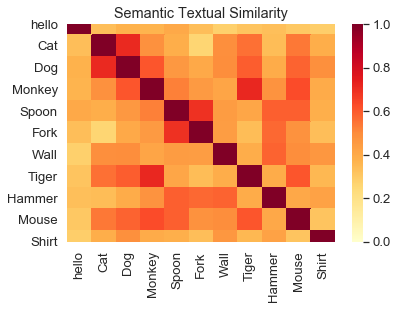

In [36]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
  g.figure.savefig("output.png")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)
messages=List1+List2
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)
  